In [1]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

Dataset imdb_reviews downloaded and prepared to /Users/catcat/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [6]:
train_data, test_data = imdb['train'], imdb['test']
tokenizer_subwords = info.features['text'].encoder


In [11]:
sample_string = 'TensorFlow, from basics to mastery'
tokenized_string = tokenizer_subwords.encode(sample_string)
print('Tokenized string is {}'.format(tokenized_string))

original_string = tokenizer_subwords.decode(tokenized_string)
print('The original string:{}'.format(original_string))


Tokenized string is [6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]
The original string:TensorFlow, from basics to mastery


In [12]:
for ts in tokenized_string:
    print('{} ---> {}'.format(ts, tokenizer_subwords.decode([ts])))

6307 ---> Ten
2327 ---> sor
4043 ---> Fl
2120 ---> ow
2 ---> , 
48 ---> from 
4249 ---> basi
4429 ---> cs 
7 ---> to 
2652 ---> master
8050 ---> y


In [24]:
for example in imdb['train'].take(2):
    print(example)

(<tf.Tensor: shape=(163,), dtype=int64, numpy=
array([  62,   18,   41,  604,  927,   65,    3,  644, 7968,   21,   35,
       5096,   36,   11,   43, 2948, 5240,  102,   50,  681, 7862, 1244,
          3, 3266,   29,  122,  640,    2,   26,   14,  279,  438,   35,
         79,  349,  384,   11, 1991,    3,  492,   79,  122,  188,  117,
         33, 4047, 4531,   14,   65, 7968,    8, 1819, 3947,    3,   62,
         27,    9,   41,  577, 5044, 2629, 2552, 7193, 7961, 3642,    3,
         19,  107, 3903,  225,   85,  198,   72,    1, 1512,  738, 2347,
        102, 6245,    8,   85,  308,   79, 6936, 7961,   23, 4981, 8044,
          3, 6429, 7961, 1141, 1335, 1848, 4848,   55, 3601, 4217, 8050,
          2,    5,   59, 3831, 1484, 8040, 7974,  174, 5773,   22, 5240,
        102,   18,  247,   26,    4, 3903, 1612, 3902,  291,   11,    4,
         27,   13,   18, 4092, 4008, 7961,    6,  119,  213, 2774,    3,
         12,  258, 2306,   13,   91,   29,  171,   52,  229,    2, 1245,
    

In [31]:
#Get the encoder
tokenizer_subwords = info.features['text'].encoder

for example in imdb['train'].take(2):
    print(tokenizer_subwords.decode(example[0]))

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was cons

## Training the model

In [32]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

#Shuffle the training data
train_dataset = train_data.shuffle(BUFFER_SIZE)

#Batch and pad the datasets to the maximum length of the sequences
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

In [52]:
 train_data

<PrefetchDataset shapes: ((None,), ()), types: (tf.int64, tf.int64)>

In [55]:
for i,j in train_dataset.take(2):
    print(i,j)

tf.Tensor(
[[  12  582    4 ...    0    0    0]
 [  62   27   57 ...    0    0    0]
 [ 156  151 7968 ...    0    0    0]
 ...
 [  62  536  694 ...    0    0    0]
 [  12   80  165 ...    0    0    0]
 [ 407  399  240 ...    0    0    0]], shape=(64, 1547), dtype=int64) tf.Tensor(
[0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1
 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0], shape=(64,), dtype=int64)
tf.Tensor(
[[6346 8039 7968 ...    0    0    0]
 [2976 8041    2 ...    0    0    0]
 [2540  307 1275 ...    0    0    0]
 ...
 [6555 5392   64 ...    0    0    0]
 [  12  742  218 ...    0    0    0]
 [  12   18 6381 ...    0    0    0]], shape=(64, 1489), dtype=int64) tf.Tensor(
[1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0], shape=(64,), dtype=int64)


In [33]:
import tensorflow as tf

embedding_dim = 64

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer_subwords.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [35]:
num_epochs = 10

#Set the training parameters
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)


Epoch 1/10
391/391 [==============================] - 30s 74ms/step - loss: 0.6913 - accuracy: 0.5472 - val_loss: 0.6686 - val_accuracy: 0.7440
Epoch 2/10
391/391 [==============================] - 33s 85ms/step - loss: 0.6304 - accuracy: 0.7288 - val_loss: 0.4948 - val_accuracy: 0.8138
Epoch 3/10
391/391 [==============================] - 32s 82ms/step - loss: 0.4411 - accuracy: 0.8426 - val_loss: 0.3814 - val_accuracy: 0.8588
Epoch 4/10
391/391 [==============================] - 26s 66ms/step - loss: 0.3315 - accuracy: 0.8808 - val_loss: 0.3416 - val_accuracy: 0.8678
Epoch 5/10
391/391 [==============================] - 37s 94ms/step - loss: 0.2820 - accuracy: 0.8985 - val_loss: 0.3202 - val_accuracy: 0.8764
Epoch 6/10
391/391 [==============================] - 29s 74ms/step - loss: 0.2545 - accuracy: 0.9079 - val_loss: 0.3114 - val_accuracy: 0.8769
Epoch 7/10
391/391 [==============================] - 36s 91ms/step - loss: 0.2314 - accuracy: 0.9167 - val_loss: 0.3092 - val_accuracy:

## Visualize the results

In [43]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string,'val'+string])
    plt.show()

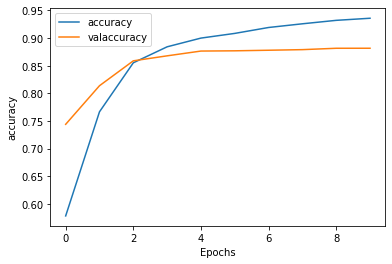

In [45]:
plot_graphs(history, 'accuracy')

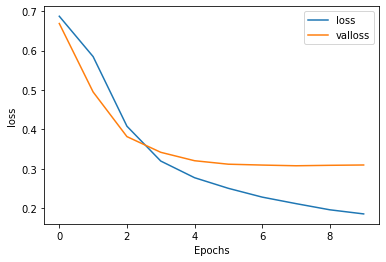

In [46]:
plot_graphs(history, 'loss')